In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import torch
# from torch import nn
# import torch.nn.functional as F
# from torch import optim
import sklearn
# from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# main function
raw_data = pd.read_csv('zhengyang/data.csv')
raw_df = pd.DataFrame({
    "gender": raw_data.gender,
    "race": raw_data.race,
    "age": raw_data.age,  
    "atrial_fibrillation": raw_data.atrial_fibrillation,
    "ischemic_stroke": raw_data.ischemic_stroke, 
    "trsnsient_ischemic_attack": raw_data.trsnsient_ischemic_attack,
    "peripheral_arterial_occusive": raw_data.peripheral_arterial_occusive, 
    "myocardial_infarction": raw_data.myocardial_infarction,
    "congestive_heart_failure": raw_data.congestive_heart_failure,
    "hypertension": raw_data.hypertension,
    "diabates_mellitus": raw_data.diabates_mellitus,
    "hyperlipidemia": raw_data.hyperlipidemia,
    "aspirin": raw_data.aspirin,
    #"warfarin":raw_data.warfarin,
    "bb": raw_data.bb,
    "heartrate_max": raw_data.heartrate_max,
    "sbp_min": raw_data.sbp_min,
    #"map_min": raw_data.map_min,
    "base_excess_val": raw_data.base_excess_val,
    "ph_val": raw_data.ph_val,
    "hemoglobin_val": raw_data.hemoglobin_val,
    "lactate_val": raw_data.lactate_val,
    "pt_val": raw_data.pt_val,
    "ptt_val": raw_data.ptt_val,
    "inr_val": raw_data.inr_val,
    "urea_nitrogen_val": raw_data.urea_nitrogen_val,
    "creatinine_val": raw_data.creatinine_val,
    "platelet_count_val": raw_data.platelet_count_val,
    "bilirubin_val": raw_data.bilirubin_val,
    "albumin_val": raw_data.albumin_val,
    "bun": raw_data.bun,
    "label": raw_data.trans
})
# change the race and gender into values
raw_df['gender'] = raw_df['gender'].replace(['F'], 1)
raw_df['gender'] = raw_df['gender'].replace(['M'], 0)
raw_df['race'] = raw_df['race'].replace(['WHITE'], 1)
raw_df['race'] = raw_df['race'].replace(['BLACK/AFRICAN AMERICAN', 'HISPANIC/LATINO - DOMINICAN',
       'WHITE - OTHER EUROPEAN', 'OTHER', 'ASIAN','UNKNOWN'],0)
raw_df['race'] = raw_df['race'].replace(['ASIAN - CHINESE', 'BLACK/CARIBBEAN ISLAND', 'BLACK/CAPE VERDEAN',
       'ASIAN - SOUTH EAST ASIAN', 'HISPANIC/LATINO - PUERTO RICAN',
       'WHITE - RUSSIAN', 'WHITE - EASTERN EUROPEAN'],0)
raw_df['race'] = raw_df['race'].replace(['PATIENT DECLINED TO ANSWER', 'MULTIPLE RACE/ETHNICITY',
       'HISPANIC/LATINO - HONDURAN', 'UNABLE TO OBTAIN', 'PORTUGUESE',
       'HISPANIC/LATINO - COLUMBIAN', 'HISPANIC OR LATINO'],0)
raw_df['race'] = raw_df['race'].replace(['AMERICAN INDIAN/ALASKA NATIVE', 'BLACK/AFRICAN',
       'WHITE - BRAZILIAN', 'HISPANIC/LATINO - GUATEMALAN',
       'HISPANIC/LATINO - SALVADORAN', 'HISPANIC/LATINO - MEXICAN',
       'SOUTH AMERICAN'],0)
raw_df['race'] = raw_df['race'].replace(['NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
       'ASIAN - ASIAN INDIAN', 'ASIAN - KOREAN'],0)
raw_df['gender']=raw_df['gender'].astype(float)
raw_df['race']=raw_df['race'].astype(float)
raw_df
# data pre-processing
all_features = list(raw_df)
target = ['new_label']
features = list(set(all_features)-set(target))
# raw_df.features = DataScaler(raw_df.features)
# raw_df[:,features] = DataScaler(raw_df[:,features])

# fill the binary missing values
raw_df['atrial_fibrillation'] = raw_df['atrial_fibrillation'].fillna(0)
raw_df['ischemic_stroke'] = raw_df['ischemic_stroke'].fillna(0)
raw_df['trsnsient_ischemic_attack'] = raw_df['trsnsient_ischemic_attack'].fillna(0)
raw_df['peripheral_arterial_occusive'] = raw_df['peripheral_arterial_occusive'].fillna(0)
raw_df['myocardial_infarction'] = raw_df['myocardial_infarction'].fillna(0)
raw_df['congestive_heart_failure'] = raw_df['congestive_heart_failure'].fillna(0)
raw_df['hypertension'] = raw_df['hypertension'].fillna(0)
raw_df['diabates_mellitus'] = raw_df['diabates_mellitus'].fillna(0)
raw_df['hyperlipidemia'] = raw_df['hyperlipidemia'].fillna(0)
raw_df['aspirin'] = raw_df['aspirin'].fillna(0)
#raw_df['warfarin'] = raw_df['warfarin'].fillna(0)
raw_df['bb'] = raw_df['bb'].fillna(0)

raw_df
# raw_df(raw_df.info())
# Impute with mean imputation
from sklearn.impute import SimpleImputer
df = raw_df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df['heartrate_max'] = mean_imputer.fit_transform(df['heartrate_max'].values.reshape(-1,1))
#df['map_min'] = mean_imputer.fit_transform(df['map_min'].values.reshape(-1,1))
df['base_excess_val'] = mean_imputer.fit_transform(df['base_excess_val'].values.reshape(-1,1))
df['ph_val'] = mean_imputer.fit_transform(df['ph_val'].values.reshape(-1,1))
df['hemoglobin_val'] = mean_imputer.fit_transform(df['hemoglobin_val'].values.reshape(-1,1))
df['lactate_val'] = mean_imputer.fit_transform(df['lactate_val'].values.reshape(-1,1))
df['pt_val'] = mean_imputer.fit_transform(df['pt_val'].values.reshape(-1,1))
df['ptt_val'] = mean_imputer.fit_transform(df['ptt_val'].values.reshape(-1,1))
df['inr_val'] = mean_imputer.fit_transform(df['inr_val'].values.reshape(-1,1))
df['urea_nitrogen_val'] = mean_imputer.fit_transform(df['urea_nitrogen_val'].values.reshape(-1,1))
df['creatinine_val'] = mean_imputer.fit_transform(df['creatinine_val'].values.reshape(-1,1))
df['platelet_count_val'] = mean_imputer.fit_transform(df['platelet_count_val'].values.reshape(-1,1))
df['bilirubin_val'] = mean_imputer.fit_transform(df['bilirubin_val'].values.reshape(-1,1))
df['albumin_val'] = mean_imputer.fit_transform(df['albumin_val'].values.reshape(-1,1))
df
# reduce the dtype
df = df.astype('float32')

In [22]:
# reverse the label: transfusion for 0, non-transfusion for 1
def reverselabel(row):  
    if row['label'] > 0:
        return 0
    return 1

In [23]:
# reverse the label
df['new_label'] = df.apply(lambda row: reverselabel(row), axis=1)
del df["label"]
df

,gender,race,age,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,hypertension,...,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,bun,new_label
0,1.0,0.0,50.681782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.600000,23.500000,1.200000,18.0,44.000000,182.0,0.4000,3.300000,0.409091,0
1,1.0,0.0,66.859550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.009886,34.172657,1.485927,25.0,140.800003,622.0,0.1000,3.250706,0.177557,0
2,0.0,0.0,55.191311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.000000,29.500000,1.200000,21.0,52.799999,102.0,3.2000,2.700000,0.397727,0
3,1.0,0.0,34.918964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.700000,28.000000,1.200000,13.0,52.799999,279.0,1.4601,3.250706,0.246212,0
4,0.0,0.0,52.317101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.000000,28.100000,1.200000,21.0,96.800003,100.0,1.2000,3.250706,0.216942,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2969,0.0,0.0,77.704453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.900000,39.200001,2.300000,34.0,114.400002,363.0,0.2000,3.250706,0.297203,1
2970,1.0,0.0,85.320625,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,16.009886,34.172657,1.485927,30.0,79.199997,407.0,0.4000,3.250706,0.378788,1
2971,1.0,0.0,34.281773,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,16.009886,34.172657,1.485927,5.0,52.799999,279.0,1.4601,3.400000,0.094697,1
2972,0.0,0.0,25.790833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.009886,34.172657,1.485927,26.0,70.400002,229.0,0.3000,3.250706,0.369318,1


In [24]:
train_data = df.sample(2230)
test_data = df.drop(train_data.index)
x_train = train_data.drop(target,axis=1)
y_train = train_data.loc[:,'new_label']
x_valid = test_data.drop(target,axis=1)
y_valid = test_data.loc[:,'new_label']

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_valid = np.asarray(x_valid)
y_valid = np.asarray(y_valid)

In [25]:
x = df.drop(target, axis=1)
y = df.loc[:, 'new_label']
x.head()

,gender,race,age,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,hypertension,...,lactate_val,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,bun
0,1.0,0.0,50.681782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.300000,12.600000,23.500000,1.200000,18.0,44.000000,182.0,0.4000,3.300000,0.409091
1,1.0,0.0,66.859550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.161898,16.009886,34.172657,1.485927,25.0,140.800003,622.0,0.1000,3.250706,0.177557
2,0.0,0.0,55.191311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.161898,13.000000,29.500000,1.200000,21.0,52.799999,102.0,3.2000,2.700000,0.397727
3,1.0,0.0,34.918964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.161898,12.700000,28.000000,1.200000,13.0,52.799999,279.0,1.4601,3.250706,0.246212
4,0.0,0.0,52.317101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.900000,13.000000,28.100000,1.200000,21.0,96.800003,100.0,1.2000,3.250706,0.216942


In [26]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, shuffle=True, stratify=y, random_state=22)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_valid = np.asarray(x_valid)
y_valid = np.asarray(y_valid)

In [27]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_valid)
score=accuracy_score(y_pred,y_valid)
score

0.8172043010752689

In [29]:
from sklearn.metrics import roc_curve
y_pred_proba=model.predict_proba(x_valid)
y_pred_proba[:,1] #想看输血分类为1的概率
fpr,tpr,thres=roc_curve(y_valid,y_pred_proba[:,1])


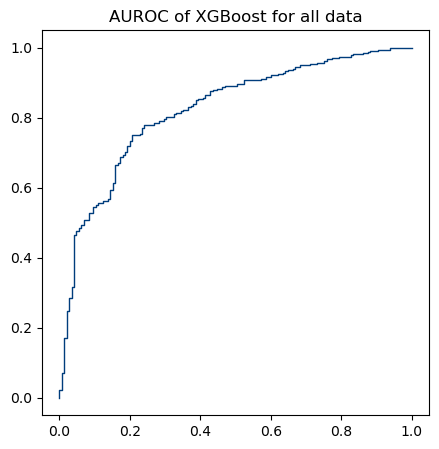

In [30]:
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
plt.figure(figsize = (5,5))
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.title('AUROC of XGBoost for all data')
plt.plot(fpr,tpr,c = '#003D7C',ls='-',lw = 1,  ms = 8, mec='r',mew=3,mfc='y',alpha =1)
plt.show()

Text(46.25, 0.5, 'True')

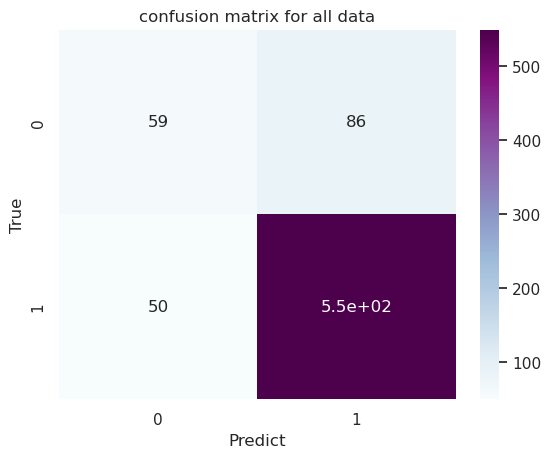

In [42]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sn.set()
f,ax=plt.subplots()
C2= confusion_matrix(y_valid, y_pred)
sn.heatmap(C2,annot=True,ax=ax, cmap="BuPu") #画热力图
ax.set_title('confusion matrix for all data')
ax.set_xlabel('Predict')
ax.set_ylabel('True')

In [33]:
test_data.shape()

TypeError: 'tuple' object is not callable

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

roc_auc_score(y_valid,y_pred_proba[:,1])



0.8242703356168326

In [35]:
tpr

array([0.        , 0.00166945, 0.02337229, 0.02337229, 0.07178631,
       0.07178631, 0.17195326, 0.17195326, 0.24707846, 0.24707846,
       0.28547579, 0.28547579, 0.31719533, 0.31719533, 0.46410684,
       0.46410684, 0.47579299, 0.47579299, 0.48414023, 0.48414023,
       0.49248748, 0.49248748, 0.50751252, 0.50751252, 0.52754591,
       0.52754591, 0.5442404 , 0.5442404 , 0.5509182 , 0.5509182 ,
       0.55759599, 0.55759599, 0.56260434, 0.56260434, 0.56761269,
       0.56761269, 0.59265442, 0.59265442, 0.61268781, 0.61268781,
       0.66444073, 0.66444073, 0.67111853, 0.67111853, 0.68781302,
       0.68781302, 0.69449082, 0.69449082, 0.70116861, 0.70116861,
       0.71953255, 0.71953255, 0.73288815, 0.73288815, 0.74958264,
       0.74958264, 0.75459098, 0.75459098, 0.77128548, 0.77128548,
       0.77796327, 0.77796327, 0.77963272, 0.77963272, 0.78464107,
       0.78464107, 0.78631052, 0.78631052, 0.79131886, 0.79131886,
       0.79632721, 0.79632721, 0.80133556, 0.80133556, 0.80300

In [36]:
thres

array([1.9999809 , 0.9999809 , 0.9999436 , 0.99994326, 0.9998134 ,
       0.99980766, 0.99942136, 0.9993993 , 0.99881136, 0.9988096 ,
       0.9984269 , 0.9984107 , 0.99807286, 0.9980586 , 0.99422616,
       0.9942186 , 0.9935855 , 0.9935481 , 0.99316895, 0.99298483,
       0.992463  , 0.99237627, 0.99180907, 0.9915473 , 0.9903776 ,
       0.9901496 , 0.9893355 , 0.9892379 , 0.9887233 , 0.98870134,
       0.98829365, 0.98805106, 0.98791903, 0.98767626, 0.9863667 ,
       0.9862874 , 0.9827346 , 0.9827305 , 0.97977245, 0.979474  ,
       0.9722055 , 0.97215873, 0.97114706, 0.9710084 , 0.9671847 ,
       0.9668521 , 0.9649003 , 0.9640558 , 0.96211404, 0.9619972 ,
       0.95381755, 0.9537844 , 0.94660443, 0.94622254, 0.93980527,
       0.9390188 , 0.9372503 , 0.9362823 , 0.9216922 , 0.9215792 ,
       0.9191324 , 0.91858006, 0.9146701 , 0.9057404 , 0.90319026,
       0.90177745, 0.9012644 , 0.90069157, 0.89847404, 0.8965605 ,
       0.89169127, 0.8879929 , 0.88176537, 0.8768799 , 0.87682

In [37]:
y_threshold = 1.53886926e-04

In [38]:
y_pred_proba=model.predict_proba(x_valid)

In [39]:
y_pred_thres = (y_pred_proba[:,1]>=y_threshold).astype(int)

In [40]:
C2

array([[549,  50],
       [ 86,  59]])